# Car Bayesian Network
Creating bayesian network to model use cases in [https://synergo.atlassian.net/wiki/spaces/CLNTMMC/pages/1812529153/RFP+-+Extra+use+cases+-+Appendix+A](https://synergo.atlassian.net/wiki/spaces/CLNTMMC/pages/1812529153/RFP+-+Extra+use+cases+-+Appendix+A).

Doing path-setting:

In [1]:
import os
import sys
from typing import *
from typing import Union, List, Any

import itertools

os.getcwd()
# Setting the baseline:
os.chdir('/development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels')


curPath: str = os.getcwd() + "/src/PgmpyStudy/"

dataPath: str = os.getcwd() + "/src/_data/"
imagePath: str = curPath + 'images/'

print("curPath = ", curPath, "\n")
print("dataPath = ", dataPath, "\n")
print('imagePath = ', imagePath, "\n")


# Making files in utils folder visible here: to import my local print functions for nn.Module objects
sys.path.append(os.getcwd() + "/src/utils/")
# For being able to import files within PgmpyStudy folder
sys.path.append(curPath)

#sys.path.remove('/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/utils/')
#sys.path.remove('/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/PgmpyStudy/')

sys.path

curPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/PgmpyStudy/ 

dataPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/_data/ 

imagePath =  /development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/PgmpyStudy/images/ 



['/development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/PgmpyStudy',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python37.zip',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/lib-dynload',
 '',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages/IPython/extensions',
 '/home/statisticallyfit/.ipython',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/utils/',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/PgmpyStudy/']

Science imports:

In [2]:
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from pgmpy.factors.discrete import JointProbabilityDistribution
from pgmpy.factors.discrete.DiscreteFactor import DiscreteFactor
from pgmpy.independencies import Independencies
from pgmpy.independencies.Independencies import IndependenceAssertion


from operator import mul
from functools import reduce


from src.utils.GraphvizUtil import *
from src.utils.NetworkUtil import *
from src.utils.DataUtil import *
from src.utils.GenericUtil import *

import pandas as pd
from pandas.core.frame import DataFrame

## Step 1: Creating / Loading Data

In [3]:
import collections

# Create named tuple class with names "Names" and "Objects"
RandomVariable = collections.namedtuple("RandomVariable", ["var", "states"])


ProcessType = RandomVariable(var = "ProcessType", states = ['Accel-Pedal',
                                                            'Door-Mount',
                                                            'Engine-Mount',
                                                            'Engine-Wiring',
                                                            'Oil-Fill',
                                                            'Sun-Roof-Housing'])

ToolType = RandomVariable(var = "ToolType", states = ['Forklift', 'Front-Right-Door', 'Oil', 'Power-Gun'])

InjuryType = RandomVariable(var = "InjuryType", states = ['Chemical-Burn',
                                                          'Contact-Contusion',
                                                          'Electrical-Burn',
                                                          'Electrical-Shock',
                                                          'Fall-Gtm'])

#AbsenteeismLevel = RandomVariable(var = "AbsenteeismLevel", states =  ['Absenteeism-00',
#                                                                       'Absenteeism-01',
#                                                                       'Absenteeism-02',
#                                                                       'Absenteeism-03'])
AbsenteeismLevel = RandomVariable(var = "AbsenteeismLevel", states =  ['Low', 'Medium', 'High'])


# Make 30 days to represent 1 month
Time = RandomVariable(var = "Time", states = list(map(lambda day : str(day), range(1, 31))))

#TrainingLevel = RandomVariable(var = "TrainingLevel", states = ['Training-00',
#                                                                'Training-01',
#                                                                'Training-02',
#                                                                'Training-03'])
TrainingLevel = RandomVariable(var = "TrainingLevel", states = ['Low', 'Medium', 'High'])

#ExertionLevel = RandomVariable(var = "ExertionLevel", states = ['Exertion-00',
#                                                                'Exertion-01',
#                                                                'Exertion-02',
#                                                                'Exertion-03'])
ExertionLevel = RandomVariable(var = "ExertionLevel", states = ['Low', 'Medium', 'High'])

#ExperienceLevel = RandomVariable(var = "ExperienceLevel", states = ['Experience-00',
#                                                                    'Experience-01',
#                                                                    'Experience-02',
#                                                                    'Experience-03'])
ExperienceLevel = RandomVariable(var = "ExperienceLevel", states = ['Low', 'Medium', 'High'])

#WorkCapacity = RandomVariable(var = "WorkCapacity", states = ['WorkCapacity-00',
#                                                              'WorkCapacity-01',
#                                                              'WorkCapacity-02',
#                                                              'WorkCapacity-03'])
WorkCapacity = RandomVariable(var = "WorkCapacity", states = ['Low', 'Medium', 'High'])

dataDict = {Time.var : Time.states,
            TrainingLevel.var : TrainingLevel.states,
            ExertionLevel.var : ExertionLevel.states,
            ExperienceLevel.var : ExperienceLevel.states,
            WorkCapacity.var : WorkCapacity. states,
            ProcessType.var : ProcessType.states,
            ToolType.var : ToolType.states,
            InjuryType.var : InjuryType.states,
            AbsenteeismLevel.var : AbsenteeismLevel.states}

In [4]:
# Reading in the use case data
# NOTE: reading in every column as string type so the Time variable will come out string
usecaseData: DataFrame = pd.read_csv(dataPath + 'WIKI_USECASES_4_5.csv', delimiter = ',', dtype = str)
usecaseData = cleanData(usecaseData)

# Now convert the Time to int:
usecaseData[Time.var] = usecaseData[Time.var].astype(int)

data = usecaseData
# TODO: Option to later concat with white noise data (like in CarDemo Manual from CausalnexStudy)
data

,Time,TrainingLevel,ExertionLevel,ExperienceLevel,WorkCapacity,ProcessType,ToolType,InjuryType,AbsenteeismLevel
0,1,Low,Low,Low,High,Engine-Mount,Forklift,Fall-Gtm,High
1,1,Low,Low,Low,High,Engine-Mount,Forklift,Contact-Contusion,High
2,1,Low,Low,Low,High,Engine-Mount,Forklift,Fall-Gtm,High
3,1,Low,Low,Low,High,Engine-Mount,Forklift,Contact-Contusion,Medium
4,1,Low,Low,Low,High,Engine-Mount,Forklift,Contact-Contusion,High
...,...,...,...,...,...,...,...,...,...
924,30,High,High,High,Low,Oil-Fill,Oil,Chemical-Burn,High
925,30,High,High,High,Low,Oil-Fill,Oil,Chemical-Burn,High
926,30,High,High,High,Low,Oil-Fill,Front-Right-Door,Chemical-Burn,Medium
927,30,High,High,High,Low,Oil-Fill,Front-Right-Door,Chemical-Burn,Medium


## Step 2: Create Network Structure

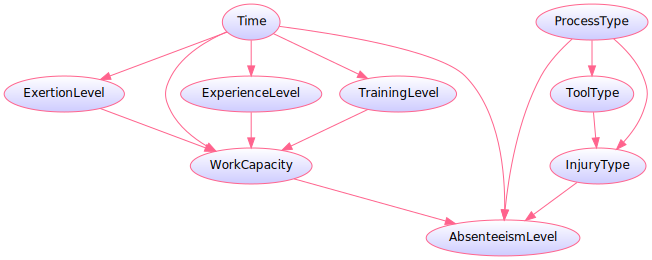

In [5]:

carModel: BayesianModel = BayesianModel([
    (ExertionLevel.var, WorkCapacity.var),
    (ExperienceLevel.var, WorkCapacity.var),
    (TrainingLevel.var, WorkCapacity.var),
    (WorkCapacity.var, AbsenteeismLevel.var),

    (Time.var, WorkCapacity.var),
    (Time.var, AbsenteeismLevel.var),
    (Time.var, ExertionLevel.var),
    (Time.var, ExperienceLevel.var),
    (Time.var, TrainingLevel.var),

    (ProcessType.var, ToolType.var),
    (ToolType.var, InjuryType.var),
    (ProcessType.var, InjuryType.var),
    (ProcessType.var, AbsenteeismLevel.var),
    (InjuryType.var, AbsenteeismLevel.var)
])


pgmpyToGraph(model = carModel)

## Step 3: Estimate CPDs

In [6]:
from pgmpy.estimators import BayesianEstimator

#est: BayesianEstimator = BayesianEstimator(model = carModel, data = data)

assert carModel.get_cpds() == [], "Check cpds are empty beforehand"

carModel.fit(data, estimator = BayesianEstimator,
             prior_type = "BDeu",
             equivalent_sample_size = 10)

In [7]:
pgmpyTabularToDataFrame(carModel, queryVar = Time.var)

,
Time,
1,0.033333
2,0.033333
3,0.033333
4,0.033333
5,0.033333
6,0.033333
7,0.033333
8,0.033333
9,0.033333


In [8]:
pgmpyTabularToDataFrame(carModel, queryVar = ProcessType.var)

,
ProcessType,
Engine-Mount,0.333333
Engine-Wiring,0.432234
Oil-Fill,0.234432


In [9]:
pgmpyTabularToDataFrame(carModel, queryVar = ToolType.var)

ProcessType,Engine-Mount,Engine-Wiring,Oil-Fill
ToolType,,,
Forklift,0.991758,0.002119,0.003906
Front-Right-Door,0.002747,0.002119,0.425781
Oil,0.002747,0.002119,0.566406
Power-Gun,0.002747,0.993644,0.003906


In [10]:
pgmpyTabularToDataFrame(carModel, queryVar = ExperienceLevel.var)

Time,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
ExperienceLevel,,,,,,,,,,,,,,,,,,,,,
High,0.003663,0.003663,0.003663,0.003663,0.003663,0.003663,0.003663,0.003663,0.003663,0.003663,...,0.003663,0.992674,0.992674,0.992674,0.992674,0.003663,0.992674,0.992674,0.992674,0.992674
Low,0.992674,0.992674,0.992674,0.003663,0.003663,0.992674,0.992674,0.992674,0.992674,0.992674,...,0.003663,0.003663,0.003663,0.003663,0.003663,0.003663,0.003663,0.003663,0.003663,0.003663
Medium,0.003663,0.003663,0.003663,0.992674,0.992674,0.003663,0.003663,0.003663,0.003663,0.003663,...,0.992674,0.003663,0.003663,0.003663,0.003663,0.992674,0.003663,0.003663,0.003663,0.003663


In [11]:
pgmpyTabularToDataFrame(carModel, queryVar = WorkCapacity.var)

ExertionLevel        High                                                    \
ExperienceLevel      High                                                     
Time                   1                             2                        
TrainingLevel        High       Low    Medium      High       Low    Medium   
WorkCapacity                                                                  
High             0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   
Low              0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   
Medium           0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   

ExertionLevel                                            ...    Medium  \
ExperienceLevel                                          ...    Medium   
Time                   3                             4   ...        27   
TrainingLevel        High       Low    Medium      High  ...    Medium   
WorkCapacity                                             ...             
High             0.333333  0.333333  0.333333  0.333333  ...  0.333333   
Low              0.333333  0.333333  0.333333  0.333333  ...  0.333333   
Medium           0.333333  0.333333  0.333333  0.333333  ...  0.333333   

ExertionLevel                                                                \
ExperienceLevel                                                               
Time                   28                            29                       
TrainingLevel        High       Low    Medium      High       Low    Medium   
WorkCapacity                                                                  
High             0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   
Low              0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   
Medium           0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   

ExertionLevel                                  
ExperienceLevel                                
Time                   30                      
TrainingLevel        High       Low    Medium  
WorkCapacity                                   
High             0.333333  0.333333  0.333333  
Low              0.333333  0.333333  0.333333  
Medium           0.333333  0.333333  0.333333  

[3 rows x 810 columns]

In [12]:
pgmpyTabularToDataFrame(carModel, queryVar = InjuryType.var)

ProcessType       Engine-Mount                                  Engine-Wiring  \
ToolType              Forklift Front-Right-Door   Oil Power-Gun      Forklift   
InjuryType                                                                      
Chemical-Burn         0.499307             0.25  0.25      0.25          0.25   
Contact-Contusion     0.299861             0.25  0.25      0.25          0.25   
Electrical-Shock      0.000693             0.25  0.25      0.25          0.25   
Fall-Gtm              0.200139             0.25  0.25      0.25          0.25   

ProcessType                                        Oil-Fill                   \
ToolType          Front-Right-Door   Oil Power-Gun Forklift Front-Right-Door   
InjuryType                                                                     
Chemical-Burn                 0.25  0.25  0.000533     0.25         0.993119   
Contact-Contusion             0.25  0.25  0.000533     0.25         0.002294   
Electrical-Shock              0.25  0.25  0.537846     0.25         0.002294   
Fall-Gtm                      0.25  0.25  0.461087     0.25         0.002294   

ProcessType                            
ToolType                Oil Power-Gun  
InjuryType                             
Chemical-Burn      0.994828      0.25  
Contact-Contusion  0.001724      0.25  
Electrical-Shock   0.001724      0.25  
Fall-Gtm           0.001724      0.25

In [13]:
pgmpyTabularToDataFrame(carModel, queryVar = AbsenteeismLevel.var)





InjuryType       Chemical-Burn                                          \
ProcessType       Engine-Mount                                           
Time                        1                             2              
WorkCapacity              High       Low    Medium      High       Low   
AbsenteeismLevel                                                         
High                  0.000616  0.333333  0.333333  0.333333  0.333333   
Low                   0.998768  0.333333  0.333333  0.333333  0.333333   
Medium                0.000616  0.333333  0.333333  0.333333  0.333333   

InjuryType                                                          ...  \
ProcessType                                                         ...   
Time                              3                             4   ...   
WorkCapacity        Medium      High       Low    Medium      High  ...   
AbsenteeismLevel                                                    ...   
High              0.000616  0.000616  0.333333  0.333333  0.000616  ...   
Low               0.998768  0.998768  0.333333  0.333333  0.998768  ...   
Medium            0.000616  0.000616  0.333333  0.333333  0.000616  ...   

InjuryType        Fall-Gtm                                                    \
ProcessType       Oil-Fill                                                     
Time                    27        28                            29             
WorkCapacity        Medium      High       Low    Medium      High       Low   
AbsenteeismLevel                                                               
High              0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   
Low               0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   
Medium            0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   

InjuryType                                                
ProcessType                                               
Time                              30                      
WorkCapacity        Medium      High       Low    Medium  
AbsenteeismLevel                                          
High              0.333333  0.333333  0.333333  0.333333  
Low               0.333333  0.333333  0.333333  0.333333  
Medium            0.333333  0.333333  0.333333  0.333333  

[3 rows x 1080 columns]

## Step 4: Inference in Bayesian Car Model

Now let us verify active trails or independencies, for each kind of chain (causal, evidential, common cause, and common evidence) that can be found along the paths of the car model graph

### 1/ Causal Reasoning in the Car Model
For a causal model $A \rightarrow B \rightarrow C$, there are two cases:
  * **Marginal Dependence:** ($B$ unknown): When $B$ is unknown / unobserved, there is an active trail between $A$ and $C$, meaning the probability of $A$ can influence probability of $C$ (and vice versa). We can say $P(A) \ne P(A \; | \; C)$
  * **Conditional Independence:** ($B$ fixed): When $B$ is fixed, there is NO active trail between $A$ and $C$, so they are independent, which means the probability of $A$ won't influence probability of $C$ (and vice versa). We can say $P(A) = P(A \; | \; C)$

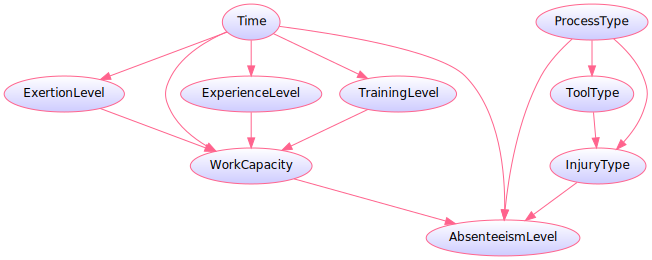

In [14]:
pgmpyToGraph(carModel)

#### Testing conditional independence:
$$
\color{DodgerBlue}{\text{WorkCapacity (observed)}: \;\;\;\;\;\;\;  \text{ExperienceLevel} \; \bot \; \text{AbsenteeismLevel} \; | \; \text{WorkCapacity}}
$$

Given that **WorkCapacity**'s state is observed, we can make the following equivalent statements:
* there is NO active trail between **ExperienceLevel** and **AbsenteeismLevel**.
* **ExperienceLevel** and **AbsenteeismLevel** are locally independent.
* the probability of **ExperienceLevel** won't influence probability of **AbsenteeismLevel** (and vice versa).


In [15]:
elim: VariableElimination = VariableElimination(model = carModel)

**Testing Conditional Independence:** Using Active Trails Methods

In [16]:
assert carModel.is_active_trail(start = ExperienceLevel.var, end = AbsenteeismLevel.var, observed = None)

assert carModel.is_active_trail(start = ExperienceLevel.var, end = AbsenteeismLevel.var, observed = [WorkCapacity.var]), "Check: still need to condition on extra variable for this not to be an active trail"

# Finding out which extra variable to condition on:
assert observedVars(carModel, startVar = ExperienceLevel.var, endVar = AbsenteeismLevel.var) == [{'Time', 'WorkCapacity'}], "Check: all list of extra variables to condition on to nullify active trail between Experience and Absenteeism"

# Check trail is nullified
assert not carModel.is_active_trail(start = ExperienceLevel.var, end = AbsenteeismLevel.var, observed = [WorkCapacity.var] + [Time.var]), "Check: active trail between Experience and Absenteeism is nullified with the extra variable observed"

# See, there is no active trail from ExperienceLevel to AbsenteeismLevel when observing WorkCapacity and time.
showActiveTrails(carModel, variables = [ExperienceLevel.var, AbsenteeismLevel.var], observed = [WorkCapacity.var, Time.var])

ExperienceLevel --> ExertionLevel
ExperienceLevel --> ExperienceLevel
ExperienceLevel --> TrainingLevel
AbsenteeismLevel --> ToolType
AbsenteeismLevel --> InjuryType
AbsenteeismLevel --> ProcessType
AbsenteeismLevel --> AbsenteeismLevel


**Testing Conditional Independence:** Using Probabilities

In [17]:
OBS_STATE_WORKCAPACITY: State = 'Low'
OBS_STATE_TIME: int = 23

EWA: DiscreteFactor = elim.query(variables = [AbsenteeismLevel.var], evidence = {WorkCapacity.var :OBS_STATE_WORKCAPACITY, Time.var : OBS_STATE_TIME})

EWA_1: DiscreteFactor = elim.query(variables = [AbsenteeismLevel.var], evidence = {WorkCapacity.var : OBS_STATE_WORKCAPACITY, Time.var: OBS_STATE_TIME, ExperienceLevel.var : 'High'})

EWA_2: DiscreteFactor = elim.query(variables = [AbsenteeismLevel.var], evidence = {WorkCapacity.var : OBS_STATE_WORKCAPACITY, Time.var : OBS_STATE_TIME, ExperienceLevel.var : 'Medium'})

EWA_3: DiscreteFactor = elim.query(variables = [AbsenteeismLevel.var], evidence = {WorkCapacity.var : OBS_STATE_WORKCAPACITY, Time.var : OBS_STATE_TIME, ExperienceLevel.var : 'Low'})

print(EWA)

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1312.36it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]  

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel: 100%|██████████| 6/6 [00:00<00:00, 302.57it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 5/5 [00:00<00:00, 2521.83it/s]


  0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/5 [00:00<?, ?it/s]   

Eliminating: TrainingLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ProcessType:   0%|          | 0/5 [00:00<?, ?it/s]  

Eliminating: ProcessType: 100%|██████████| 5/5 [00:00<00:00, 417.04it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 5/5 [00:00<00:00, 998.93it/s]


  0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/5 [00:00<?, ?it/s]   

Eliminating: TrainingLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ProcessType:   0%|          | 0/5 [00:00<?, ?it/s]  

Eliminating: ProcessType: 100%|██████████| 5/5 [00:00<00:00, 494.54it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 5/5 [00:00<00:00, 2016.49it/s]


  0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/5 [00:00<?, ?it/s]   

Eliminating: TrainingLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ProcessType:   0%|          | 0/5 [00:00<?, ?it/s]  

Eliminating: ProcessType: 100%|██████████| 5/5 [00:00<00:00, 416.79it/s]

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.4989 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3994 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.1017 |
+--------------------------+-------------------------+



The probabilities above are stated formulaically as follows:

$$
\begin{array}{ll}
P(\text{AbsenteeismLevel} = \text{High} \; | \; \Big\{  \text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23  \Big\}) \\
= P(\text{AbsenteeismLevel} = \text{High} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Low})  \\
= P(\text{AbsenteeismLevel} = \text{High} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Medium}) \\
= P(\text{AbsenteeismLevel} = \text{High} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{High}) \\
= 0.4989
\end{array}
$$

$$
\begin{array}{ll}
P(\text{AbsenteeismLevel} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\}) \\
= P(\text{AbsenteeismLevel} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Low})  \\
= P(\text{AbsenteeismLevel} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Medium}) \\
= P(\text{AbsenteeismLevel} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{High}) \\
= 0.3994
\end{array}
$$

$$
\begin{array}{ll}
P(\text{AbsenteeismLevel} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\}) \\
= P(\text{AbsenteeismLevel} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Low})  \\
= P(\text{AbsenteeismLevel} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Medium}) \\
= P(\text{AbsenteeismLevel} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{High}) \\
= 0.1017
\end{array}
$$
Since all the above stated probabilities are equal for each state of `AbsenteeismLevel` = `Low`, `Medium`, `High`, we can assert that the random variables `ExperienceLevel` and `AbsenteeismLevel` are independent of each other, when observing `WorkCapacity` state (and also observing the state of `Time` to adjust for backdoors). Arbitrarily choosing the states `backdoorStates` = `{WorkCapacity = Low, Time = 23}`, we can write:
$$
P(\text{AbsenteeismLevel} \; | \; \{\texttt{backdoorStates} \}) = P(\text{AbsenteeismLevel} \; | \; \{ \texttt{backdoorStates} \} \; \cap \; \text{ExperienceLevel})
$$

In [18]:
assert allEqual(EWA.values, EWA_1.values, EWA_2.values, EWA_3.values), "Check: the random variables Experience and Absenteeism are independent, when intermediary node WorkCapacity is observed (while accounting for backdoors)"






#### Testing marginal dependence:
$$
\color{Green}{\text{WorkCapacity (unobserved)}: \;\;\;\;\;\;\;  \text{ExperienceLevel} \longrightarrow \text{WorkCapacity} \longrightarrow \text{AbsenteeismLevel}}
$$
Given that **WorkCapacity**'s state is unobserved, we can make the following equivalent statements:
* there IS active trail between **ExperienceLevel** and **AbsenteeismLevel**.
* **ExperienceLevel** and **AbsenteeismLevel** are dependent.
* the probability of **ExperienceLevel** influences probability of **AbsenteeismLevel** (and vice versa).


**Testing Conditional Independence:** Using Active Trails Methods

In [19]:
assert carModel.is_active_trail(start = ExperienceLevel.var, end = AbsenteeismLevel.var, observed = None)

# See, there is active trail from ExperienceLevel to AbsenteeismLevel when not observing WorkCapacity variable
showActiveTrails(carModel, variables = [ExperienceLevel.var, AbsenteeismLevel.var], observed = None)

ExperienceLevel --> TrainingLevel
ExperienceLevel --> Time
ExperienceLevel --> WorkCapacity
ExperienceLevel --> ExperienceLevel
ExperienceLevel --> ExertionLevel
ExperienceLevel --> AbsenteeismLevel
AbsenteeismLevel --> ToolType
AbsenteeismLevel --> InjuryType
AbsenteeismLevel --> TrainingLevel
AbsenteeismLevel --> Time
AbsenteeismLevel --> WorkCapacity
AbsenteeismLevel --> ProcessType
AbsenteeismLevel --> ExertionLevel
AbsenteeismLevel --> AbsenteeismLevel
AbsenteeismLevel --> ExperienceLevel


**Testing Conditional Independence:** Using Probabilities

In [20]:
OBS_STATE_WORKCAPACITY: State = 'Low'
OBS_STATE_TIME: int = 23

EA: DiscreteFactor = elim.query(variables = [AbsenteeismLevel.var], evidence = {Time.var : OBS_STATE_TIME})
print(EA)

  0%|          | 0/7 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/7 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 7/7 [00:00<00:00, 1788.62it/s]


  0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: ExertionLevel:  43%|████▎     | 3/7 [00:00<00:00, 22.96it/s]

Eliminating: InjuryType:  43%|████▎     | 3/7 [00:00<00:00, 22.96it/s]   

Eliminating: TrainingLevel:  43%|████▎     | 3/7 [00:00<00:00, 22.96it/s]

Eliminating: ProcessType:  43%|████▎     | 3/7 [00:00<00:00, 22.96it/s]  

Eliminating: ExperienceLevel:  43%|████▎     | 3/7 [00:00<00:00, 22.96it/s]

Eliminating: ExperienceLevel: 100%|██████████| 7/7 [00:00<00:00, 47.40it/s]

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.4965 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3984 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.1052 |
+--------------------------+-------------------------+


In [21]:
EA_1: DiscreteFactor = elim.query(variables = [AbsenteeismLevel.var], evidence = {ExperienceLevel.var : 'High', Time.var: OBS_STATE_TIME})
print(EA_1)

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2306.46it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]  

Eliminating: ProcessType: 100%|██████████| 6/6 [00:00<00:00, 77.17it/s]

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.4973 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3987 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.1040 |
+--------------------------+-------------------------+


In [22]:
EA_2: DiscreteFactor = elim.query(variables = [AbsenteeismLevel.var], evidence = {ExperienceLevel.var : 'Medium', Time.var : OBS_STATE_TIME})
print(EA_2)

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2260.27it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]  

Eliminating: ProcessType: 100%|██████████| 6/6 [00:00<00:00, 106.88it/s]

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.3885 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3553 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.2561 |
+--------------------------+-------------------------+


In [23]:
EA_3: DiscreteFactor = elim.query(variables = [AbsenteeismLevel.var], evidence = {ExperienceLevel.var : 'Low', Time.var : OBS_STATE_TIME})
print(EA_3)

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1474.27it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]  

Eliminating: ProcessType: 100%|██████████| 6/6 [00:00<00:00, 50.58it/s]

Eliminating: ProcessType: 100%|██████████| 6/6 [00:00<00:00, 47.96it/s]

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.3885 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3553 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.2561 |
+--------------------------+-------------------------+



The probabilities above are stated formulaically as follows:
$$
\begin{array}{ll}
P(\text{AbsenteeismLevel} = \text{High} \; | \; \Big\{ \text{Time} = 23  \Big\}) = 0.4965 \\
\ne P(\text{AbsenteeismLevel} = \text{High} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Low}) = 0.3885  \\
\ne P(\text{AbsenteeismLevel} = \text{High} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Medium}) = 0.3885 \\
\ne P(\text{AbsenteeismLevel} = \text{High} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{High}) = 0.4973
\end{array}
$$

$$
\begin{array}{ll}
P(\text{AbsenteeismLevel} = \text{Low} \; | \; \Big\{ \text{Time} = 23  \Big\}) = 0.4965 \\
\ne P(\text{AbsenteeismLevel} = \text{Low} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Low}) = 0.3553 \\
\ne P(\text{AbsenteeismLevel} = \text{Low} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Medium}) = 0.3553 \\
\ne P(\text{AbsenteeismLevel} = \text{Low} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{High}) = 0.3987
\end{array}
$$

$$
\begin{array}{ll}
P(\text{AbsenteeismLevel} = \text{Medium} \; | \; \Big\{ \text{Time} = 23  \Big\}) = 0.4965 \\
\ne P(\text{AbsenteeismLevel} = \text{Medium} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Low}) = 0.2561 \\
\ne P(\text{AbsenteeismLevel} = \text{Medium} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Medium}) = 0.2561 \\
\ne P(\text{AbsenteeismLevel} = \text{Medium} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{High}) = 0.1040
\end{array}
$$


Since not all the above stated probabilities are equal for each state of `AbsenteeismLevel` = `Low`, `Medium`, `High`, we can assert that the random variables `ExperienceLevel` and `AbsenteeismLevel` are dependent of each other, when not observing `WorkCapacity` state (while  observing the state of `Time` to adjust for backdoors). Arbitrarily choosing the state `backdoorStates` = `{Time = 23}`, we can write:
$$
P(\text{AbsenteeismLevel} \; | \; \{\texttt{backdoorStates} \}) \ne P(\text{AbsenteeismLevel} \; | \; \{ \texttt{backdoorStates} \} \; \cap \; \text{ExperienceLevel})
$$

In [24]:

assert not allEqual(EA.values, EA_1.values, EA_2.values, EA_3.values), "Check: the random variables Experience and Absenteeism are dependent, when intermediary node WorkCapacity is NOT observed (while accounting for backdoors)"



In [25]:
# TODO: create "getallcausalchainswithinmodel" function , where we traverse each path and get all three-way causal chains
# TODO do the same for common parent and common effect models